# Cifar-10 이미지 분류

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os
import numpy as np

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 100
DATA_AUGMENTATION = True
NUM_PREDICTION = 20
SAVE_DIR = os.path.join(os.getcwd(), 'model')
MODEL_NAME = 'keras_cifar10_trained_model.h5'

In [4]:
(x_train, y_train0), (x_test, y_test0) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
y_test0[0]

array([3], dtype=uint8)

### 데이터 확인

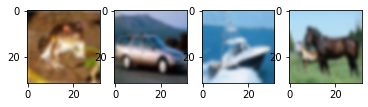

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(x_train[0], interpolation='bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation='bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation='bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation='bicubic')
plt.grid(False)
plt.show()

In [7]:
# 자료형 실수 변환, 정규화
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train0, NUM_CLASSES)
y_test = to_categorical(y_test0, NUM_CLASSES)
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

### 모델 정의/설정/학습

In [9]:
model = Sequential([
                    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
                    Conv2D(32, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(pool_size=(2, 2)),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5),
                    Dense(NUM_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [10]:
from tensorflow.keras.optimizers import RMSprop
opt = RMSprop(learning_rate=0.0001, decay=1e-6)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
modelpath = 'model/cifar10-cnn-{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[checkpointer, early_stopping], validation_split=0.2, shuffle=True)

Epoch 1/100
1250/1250 [==============================] - 9s 5ms/step - loss: 2.0561 - accuracy: 0.2361 - val_loss: 1.6234 - val_accuracy: 0.4234

Epoch 00001: val_loss improved from inf to 1.62342, saving model to model/cifar10-cnn-01-1.6234.hdf5
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6160 - accuracy: 0.4061 - val_loss: 1.4911 - val_accuracy: 0.4615

Epoch 00002: val_loss improved from 1.62342 to 1.49111, saving model to model/cifar10-cnn-02-1.4911.hdf5
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4566 - accuracy: 0.4686 - val_loss: 1.3644 - val_accuracy: 0.5213

Epoch 00003: val_loss improved from 1.49111 to 1.36438, saving model to model/cifar10-cnn-03-1.3644.hdf5
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3631 - accuracy: 0.5087 - val_loss: 1.2404 - val_accuracy: 0.5673

Epoch 00004: val_loss improved from 1.36438 to 1.24041, saving model to model/cifar10-cnn-04-1.2404.hdf5


In [16]:
from tensorflow.keras.models import load_model
best_model = load_model('model/cifar10-cnn-58-0.6445.hdf5')
acc = best_model.evaluate(x_test, y_test, verbose=2)[1]
print(f'Test Accuracy: {acc:.4f}')

313/313 - 1s - loss: 0.6485 - accuracy: 0.7844
Test Accuracy: 0.7844


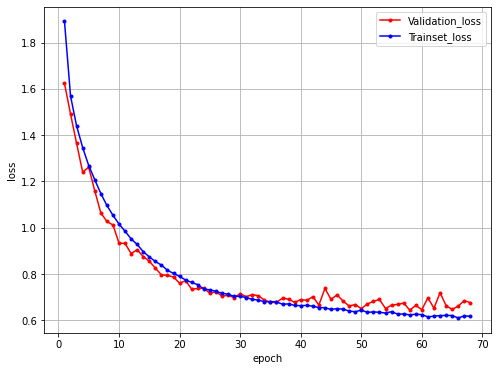

In [17]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8, 6))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Validation_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()